In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sns

%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head(3)

E:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#to get general understanding of dataset
print(df.shape)
df.describe()

(98855, 129)


,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


E:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


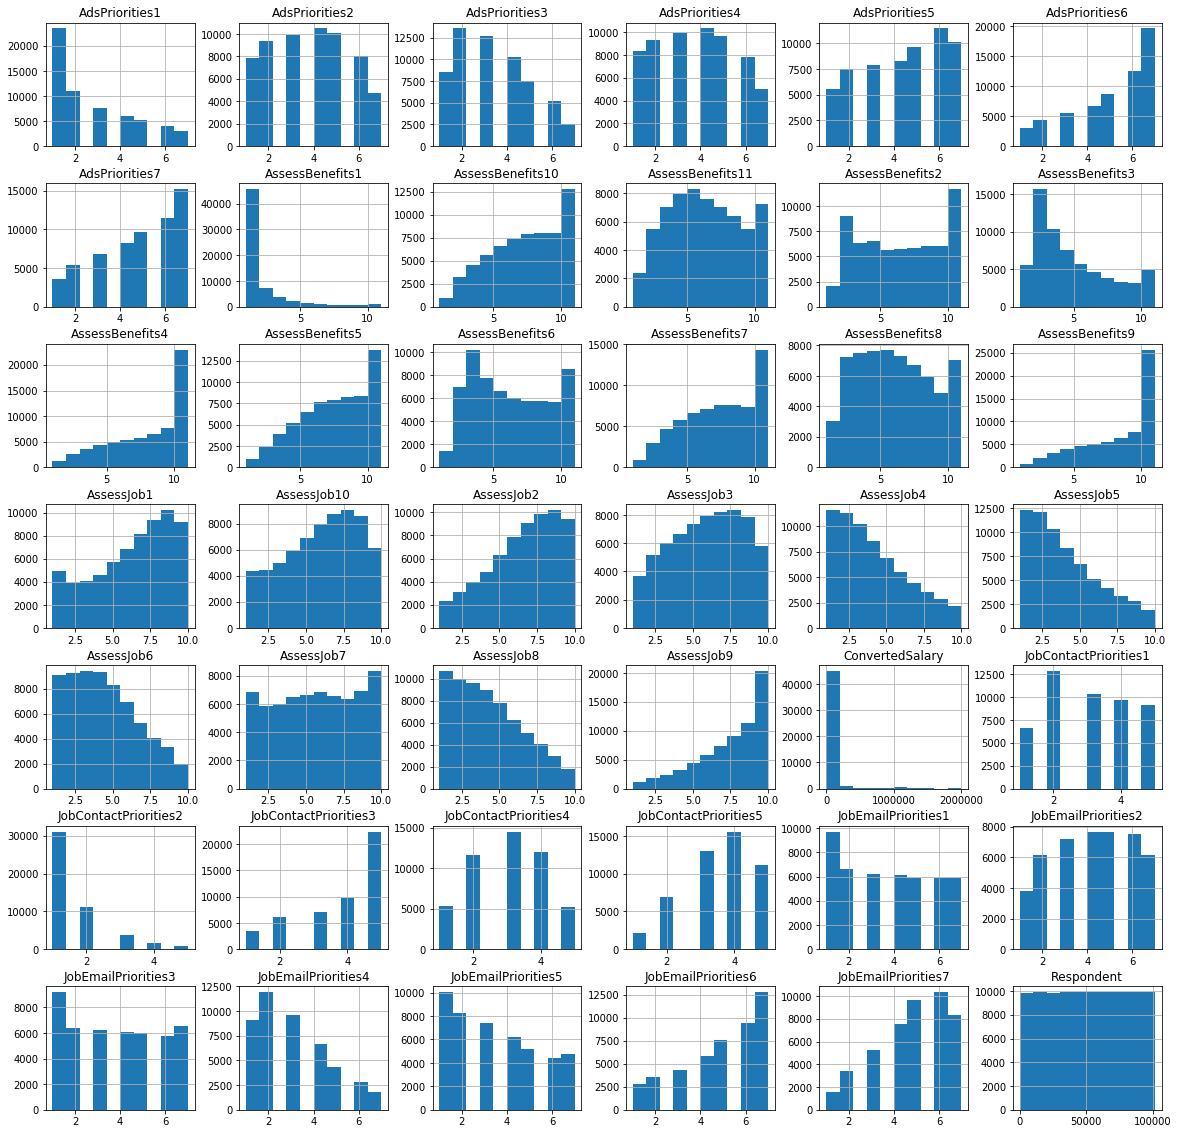

In [3]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax=ax);

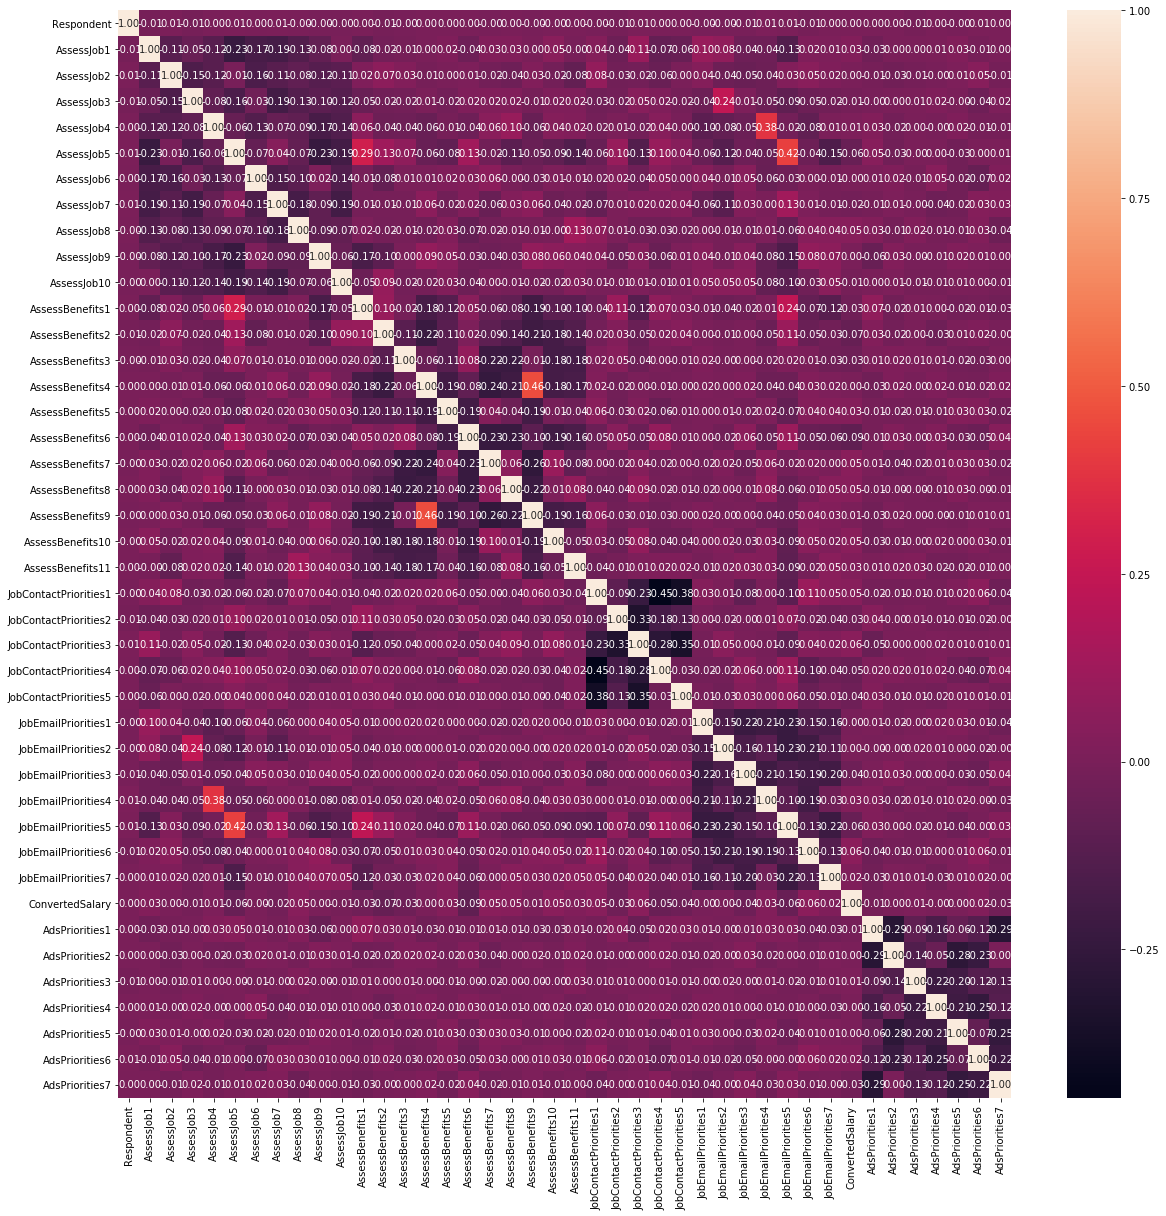

In [3]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax);

Want to predict WHERE PEOPLE WHANT TO BE IN 5 YEARS based on several criteria. Thets why will select several columns based on which will do prediction

In [4]:
filtered_df=df[['HopeFiveYears', 'Gender', 'DevType', 'Hobby','Employment','FormalEducation','UndergradMajor','YearsCoding',
                'JobSatisfaction', 'CareerSatisfaction', 'JobSearchStatus','UpdateCV',
                'EducationParents','Age']].copy()

In [5]:
filtered_df.dtypes

HopeFiveYears         object
Gender                object
DevType               object
Hobby                 object
Employment            object
FormalEducation       object
UndergradMajor        object
YearsCoding           object
JobSatisfaction       object
CareerSatisfaction    object
JobSearchStatus       object
UpdateCV              object
EducationParents      object
Age                   object
dtype: object

As I see all my columns are categorical

In [6]:
#becouse interested in getting 'HopeFiveYears' so will drop those rows where there is no data in 'HopeFiveYears' cell
filtered_df=filtered_df.dropna(subset=['HopeFiveYears'], axis=0)

In [7]:
#to see what is left
filtered_df.shape

(75718, 14)

In [8]:
#will check number of missing data in a row. Thets why will add additional column where number of missing data will be saved
filtered_df['missings_in_rows'] =filtered_df.apply(lambda x: x.count(), axis=1)
i=0
c_rows=0
index_missing_row=[]
for rw in filtered_df['missings_in_rows']:
    i+=1
    missing_percent=rw/filtered_df.shape[1]
    if missing_percent>.96:
        c_rows+=1
        index_missing_row.append(i)
        #print("Row - ",i, missing_percent)
print("Number of rows with high number of missing cells ", c_rows)

Number of rows with high number of missing cells  0


In [9]:
#As i see there is no high numer of missing data in 1 row. I dont need missings_in_rows column any more, so will drop it
df_new=filtered_df.drop(['missings_in_rows'], axis=1)

In [10]:
#Missing cells of categorical column will be filled with the mode of the column
fillmode=lambda col:col.fillna(col.mode()[0])
df_new=df_new.apply(fillmode, axis=0)

In [11]:
df_new.describe()
#https://classroom.udacity.com/nanodegrees/nd025-ent/parts/d52fd59b-fa33-4cd0-8d96-11e461669484/modules/2ef39fb9-8113-42a7-b441-39d00484a285/lessons/f3e386bb-fe90-4e3c-8fc5-ad2db83e6cf6/concepts/6a1b57aa-5eb1-481c-a9b9-62e65b687d8b

,HopeFiveYears,Gender,DevType,Hobby,Employment,FormalEducation,UndergradMajor,YearsCoding,JobSatisfaction,CareerSatisfaction,JobSearchStatus,UpdateCV,EducationParents,Age
count,75718,75718,75718,75718,75718,75718,75718,75718,75718,75718,75718,75718,75718,75718
unique,7,15,8766,2,6,9,12,11,7,7,3,8,9,7
top,Working in a different or more specialized tec...,Male,Full-stack developer,Yes,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",3-5 years,Moderately satisfied,Moderately satisfied,"I’m not actively looking, but I am open to new...",My job status or other personal status changed,"Bachelor’s degree (BA, BS, B.Eng., etc.)",25 - 34 years old
freq,25643,71185,5708,61636,58627,36756,52229,17772,32639,27680,45637,38752,34913,46100


In [12]:
#is called raw becouse still is text. After thet will convert into numbers (dummies)
X_raw=df_new.drop(['HopeFiveYears'], axis=1)
X=pd.get_dummies(X_raw, dummy_na=True)

#to convert text into numbers
y=pd.factorize(df_new['HopeFiveYears'])[0]

In [13]:
#splittig data into train adn test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.3, random_state=42)

#now will instantiate my model
lm_model=LinearRegression(normalize=True)

In [14]:
#now will fit model
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [15]:
#now will predict on test data
y_test_preds=lm_model.predict(X_test)
#will calcualte score on test data
rsquared_score=r2_score(y_test, y_test_preds)
length_y_test=len(y_test)

print("Prediction is - ", y_test_preds)
print("Score is - ", rsquared_score)
print("Length of testing model - ", len(y_test_preds))

Prediction is -  [2.20898438 1.62792969 1.4140625  ... 1.95507812 1.40820312 1.20507812]
Score is -  -1.0350416389715893e+29
Length of testing model -  22716


In [16]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print(test_score)
print(train_score)

-1.0350416389715893e+29
-0.5147562932537961
